In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv("output_df.csv")
df.head()

,reviewer_name,review_title,place_of_review,up_votes,down_votes,month,review_text,ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4.0
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1.0
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1.0
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3.0
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1.0


In [4]:
df.isnull().sum()

reviewer_name         10
review_title          10
place_of_review       50
up_votes              10
down_votes            10
month              11920
review_text            8
ratings                0
dtype: int64

In [5]:
df['sent'] = df['ratings'].apply(lambda rating: 'NEGATIVE' if rating <= 3 else 'POSITIVE')

In [6]:
df = df.loc[:, ['sent', "review_title","review_text"]]

In [7]:
new = df[["review_text"]].dropna()

In [8]:
new["review_title"] = df["review_title"]
new["sent"] = df["sent"]

In [9]:
from wordcloud import WordCloud, STOPWORDS

In [10]:
neg = new.loc[new['sent']=='NEGATIVE', :]
neg.head()

,review_text,review_title,sent
1,They didn't supplied Yonex Mavis 350. Outside ...,Don't waste your money,NEGATIVE
2,Worst product. Damaged shuttlecocks packed in ...,Did not meet expectations,NEGATIVE
3,"Quite O. K. , but nowadays the quality of the...",Fair,NEGATIVE
4,Over pricedJust â?¹620 ..from retailer.I didn'...,Over priced,NEGATIVE
13,This is the second time i am getting an opened...,Did not meet expectations,NEGATIVE


In [11]:
neg['sent'].value_counts()

sent
NEGATIVE    2892
Name: count, dtype: int64

In [12]:
words = ' '.join(neg['review_text'])
print(words[:2000])

They didn't supplied Yonex Mavis 350. Outside cover was Yonex Ad inside was a cheapest....  Sad to hear this.READ MORE Worst product. Damaged shuttlecocks packed in new box. It's not a original yonex product. Don't buy.flipkart platform is chosen to fraud the buyers.READ MORE Quite O. K. , but nowadays  the quality of the corks like not as before 3 to 5 years back.. I am using MAVIS 350 for more than 15 years quality of corks was very very good at that times, but now I am not getting the quality corks as like before, rate of corks also too much now, I am  very sorry to say like this, but in my experience , my Statment is very true to   my knowledgeREAD MORE Over pricedJust â?¹620 ..from retailer.I didn't understand.. Wat is d advantage of buying dis frm flipkrtREAD MORE This is the second time i am getting an opened bundle of Yonex mavis 350 shuttle. I really believe this is not an original product, or someone may have switched the shuttle inside the bundle. Don't buy from flipkart. I 

In [13]:
neg = new.loc[new['sent']=='NEGATIVE', :]
words = ' '.join(new['review_text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [14]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)

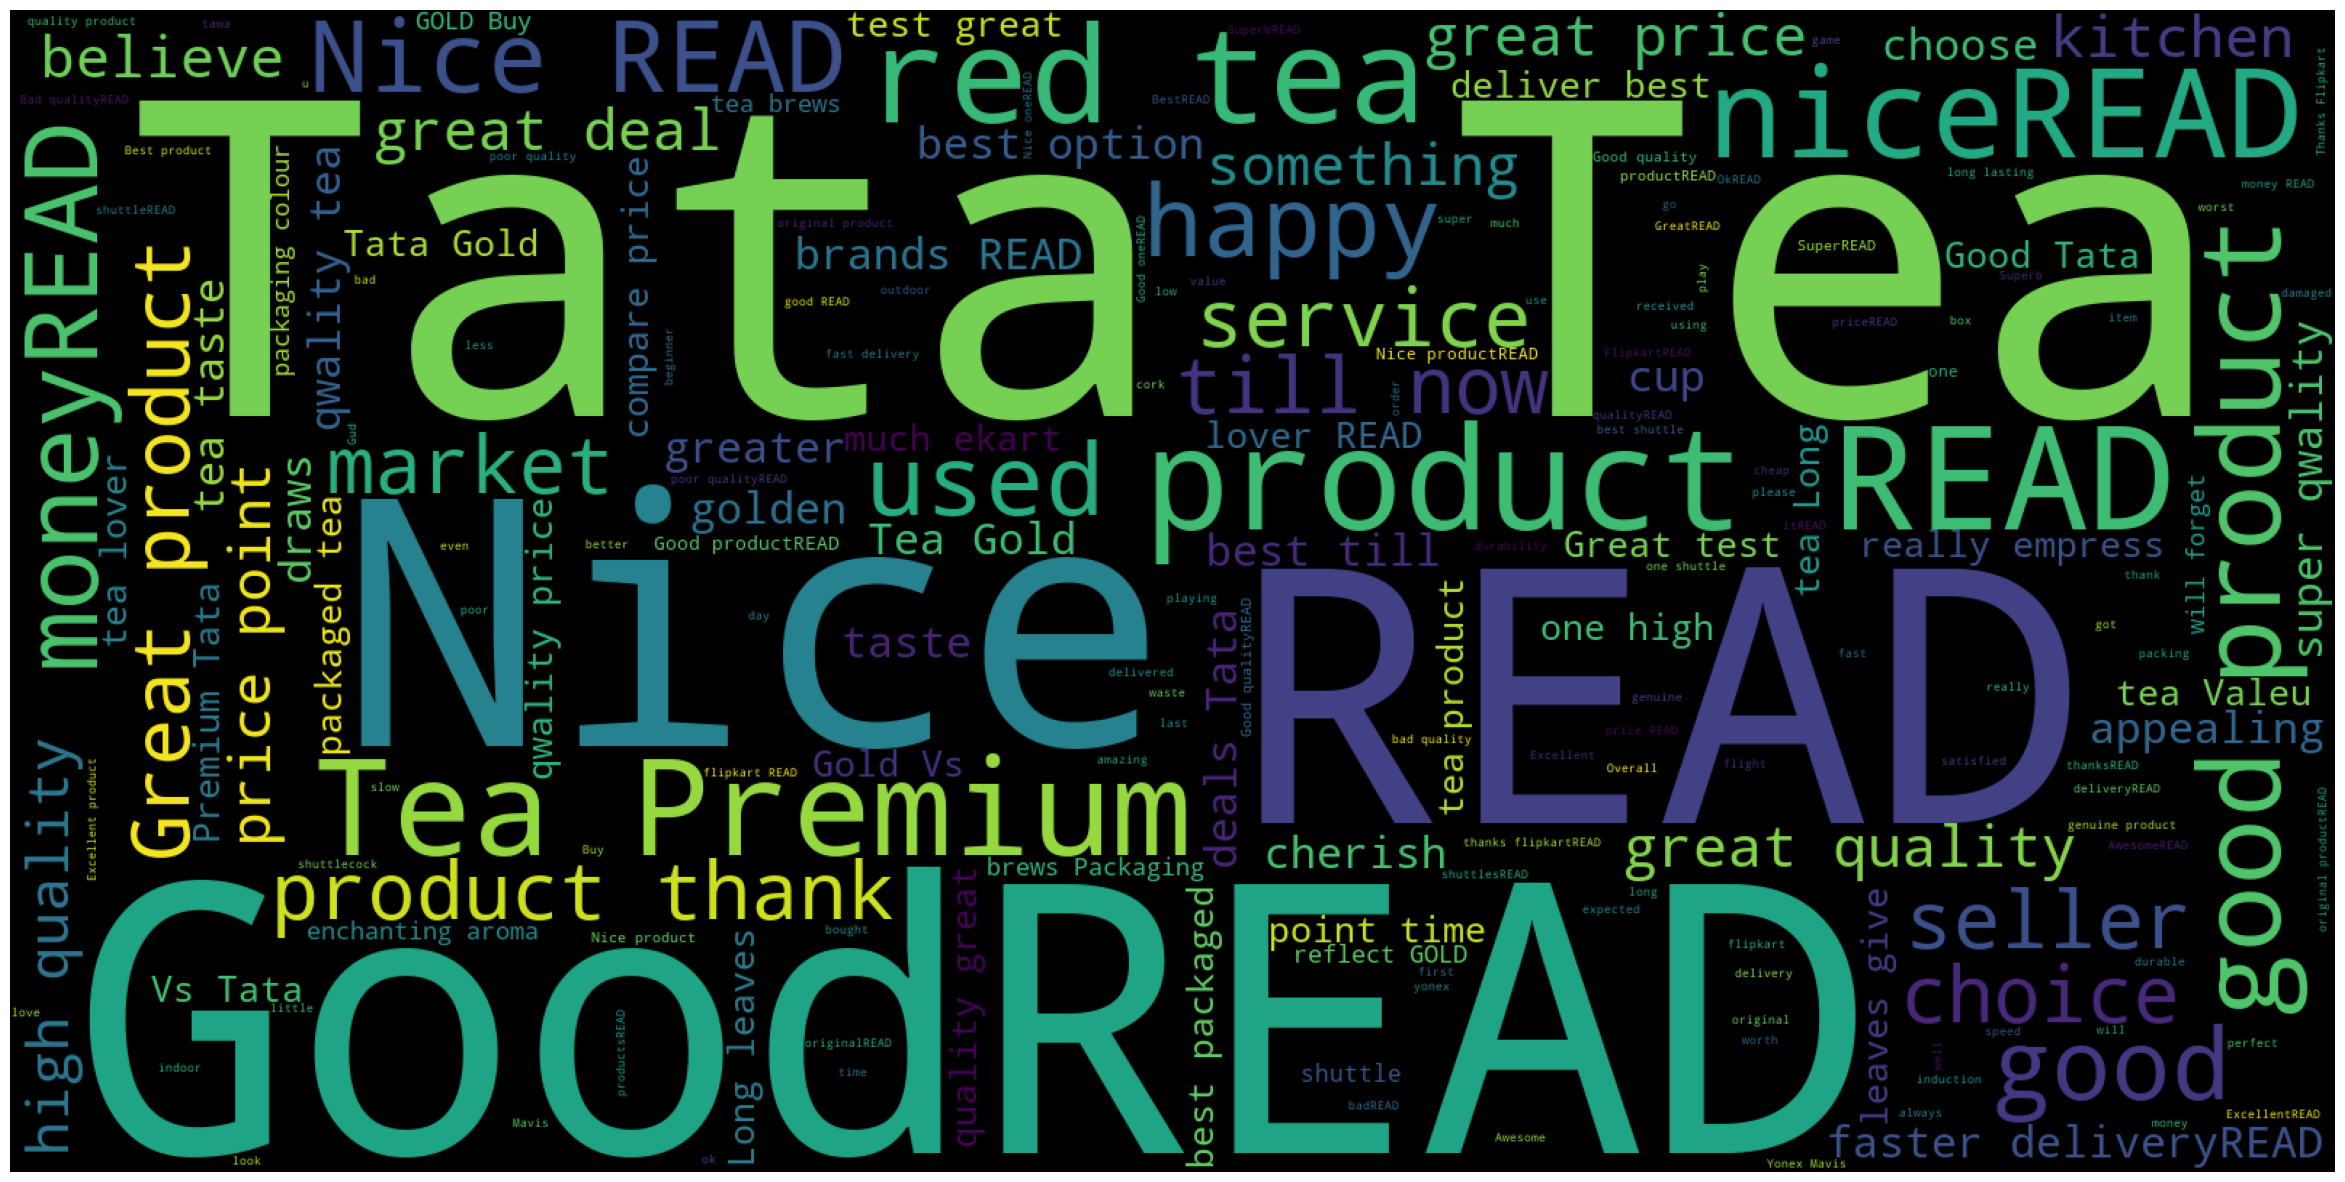

In [15]:
plt.figure(1,figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [16]:
pos = new.loc[new['sent']=='POSITIVE', :]
words = ' '.join(new['review_text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [17]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)

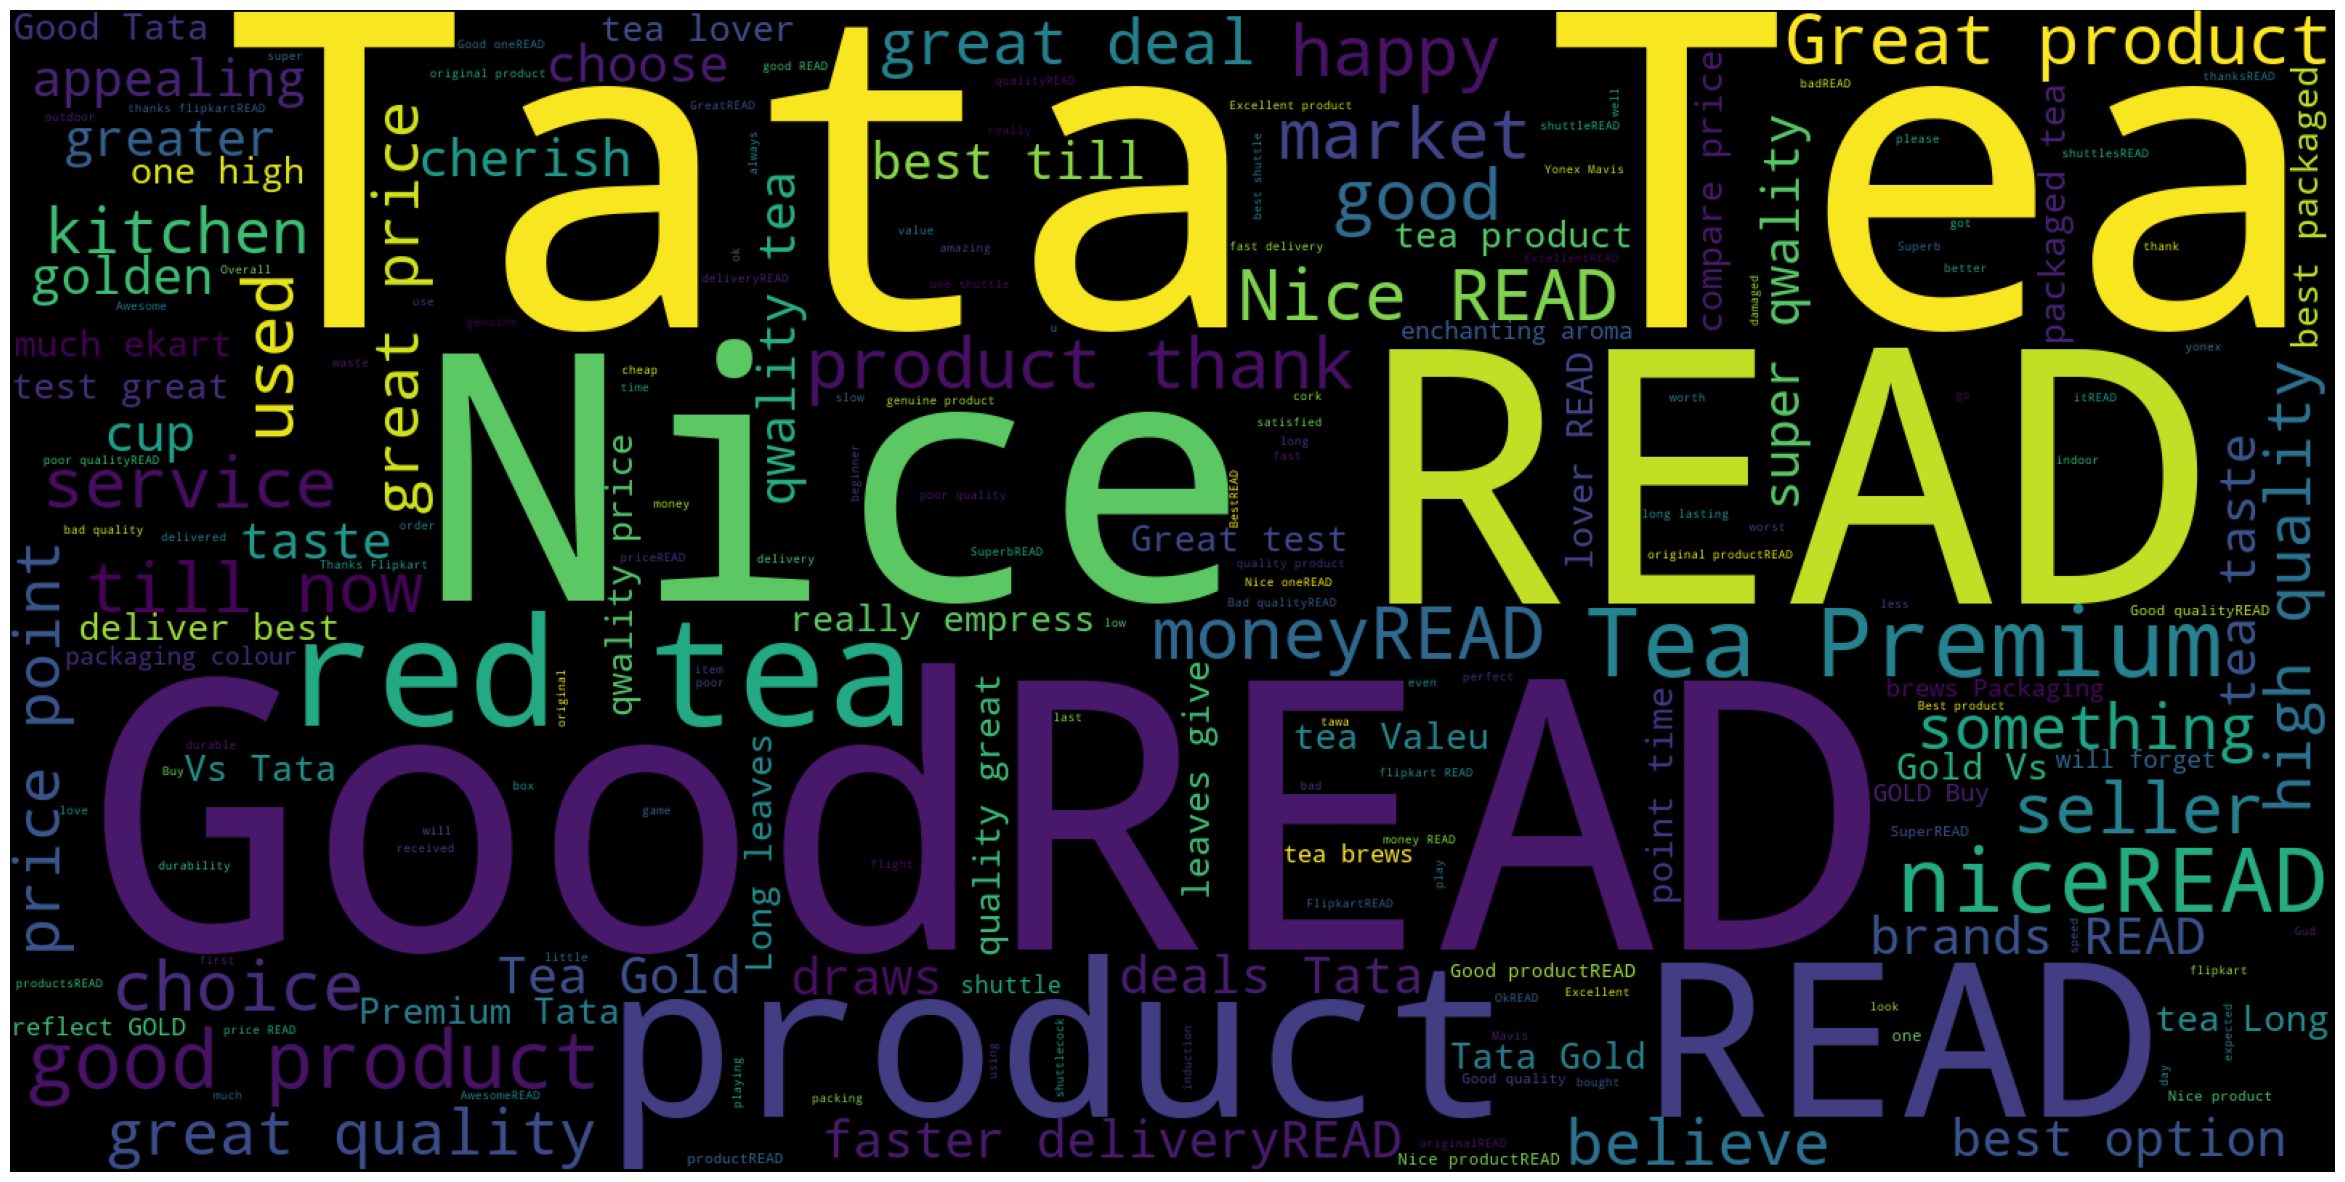

In [18]:
plt.figure(1,figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [19]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [20]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [22]:
clean_tweet_lst = []
tweet_len_lst = []

In [23]:
def preprocess(raw_tweet, flag):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet)
    letters_only = letters_only.lower()
    words = letters_only.split()
    words = [w for w in words if not w in stopwords.words("english")]
    if(flag == 'stem'):
        words = [stemmer.stem(word) for word in words]
    else:
        words = [lemmatizer.lemmatize(word) for word in words]
    clean_tweet_lst.append(" ".join(words))
    tweet_len_lst.append(len(words))

In [24]:
from tqdm import tqdm, tqdm_notebook
tqdm.pandas()

In [25]:
clean_tweet_lst = []
tweet_len_lst = []
new['review_text'].progress_apply(lambda x: preprocess(x, 'stem'))
new['clean_tweet_stem'] = clean_tweet_lst
new['tweet_length_stem'] = tweet_len_lst

100%|███████████████████████████████████████████████████████████████████████████| 19965/19965 [01:34<00:00, 211.47it/s]


In [26]:
clean_tweet_lst = []
tweet_len_lst = []
new['review_text'].progress_apply(lambda x: preprocess(x, 'lemma'))
new['clean_tweet_lema'] = clean_tweet_lst
new['tweet_length_lema'] = tweet_len_lst

100%|███████████████████████████████████████████████████████████████████████████| 19965/19965 [01:36<00:00, 207.80it/s]


In [27]:
new['sentiment']=new['sent'].apply(lambda x: 0 if x=='NEGATIVE' else 1)
new.head()

,review_text,review_title,sent,clean_tweet_stem,tweet_length_stem,clean_tweet_lema,tweet_length_lema,sentiment
0,"Nice product, good quality, but price is now r...",Nice product,POSITIVE,nice product good qualiti price rise bad sign ...,20,nice product good quality price rising bad sig...,20,1
1,They didn't supplied Yonex Mavis 350. Outside ...,Don't waste your money,NEGATIVE,suppli yonex mavi outsid cover yonex ad insid ...,12,supplied yonex mavis outside cover yonex ad in...,12,0
2,Worst product. Damaged shuttlecocks packed in ...,Did not meet expectations,NEGATIVE,worst product damag shuttlecock pack new box o...,17,worst product damaged shuttlecock packed new b...,17,0
3,"Quite O. K. , but nowadays the quality of the...",Fair,NEGATIVE,quit k nowaday qualiti cork like year back use...,30,quite k nowadays quality cork like year back u...,30,0
4,Over pricedJust â?¹620 ..from retailer.I didn'...,Over priced,NEGATIVE,pricedjust retail understand wat advantag buy ...,9,pricedjust retailer understand wat advantage b...,9,0


In [28]:
from sklearn.model_selection  import train_test_split
train, test = train_test_split(new,test_size=0.2,random_state=42)

In [29]:
train_clean_tweet=[]
for tweet in train['clean_tweet_stem']:
    train_clean_tweet.append(tweet)
test_clean_tweet=[]
for tweet in test['clean_tweet_stem']:
    test_clean_tweet.append(tweet)

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1,2))
train_features = vectorizer.fit_transform(train_clean_tweet)
test_features = vectorizer.transform(test_clean_tweet)

In [31]:
print("Total unique words:", len(vectorizer.vocabulary_))
print("Type of train_features:", type(train_features))
print("Shape of input data", train_features.shape)

Total unique words: 14218
Type of train_features: <class 'scipy.sparse._csr.csr_matrix'>
Shape of input data (15972, 14218)


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

In [33]:
Classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200)
]

In [34]:
for classifier in Classifiers:
    model = classifier.fit(train_features, train['sentiment'])
    pred = model.predict(test_features)
    accuracy = accuracy_score(pred, test['sentiment'])
    f1 = f1_score(test['sentiment'], pred, zero_division=1, average='macro')
    print('Accuracy of ' + classifier.__class__.__name__ + ' is ' + str(accuracy))
    print('F1 Score of ' + classifier.__class__.__name__ + ' is ' + str(f1))

Accuracy of LogisticRegression is 0.9321312296518908
F1 Score of LogisticRegression is 0.8493406636093064
Accuracy of DecisionTreeClassifier is 0.9203606311044328
F1 Score of DecisionTreeClassifier is 0.8333810097175843
Accuracy of RandomForestClassifier is 0.9296268469822189
F1 Score of RandomForestClassifier is 0.8411539135084432


In [35]:
model = LogisticRegression()
model.fit(train_features,train['sentiment'])

LogisticRegression()

In [36]:
import os
from pickle import dump
pickle_dir = os.path.abspath('pickle')
os.makedirs(pickle_dir, exist_ok=True)
countvectorizer_path = os.path.join(pickle_dir, 'countvectorizer.pkl')
dump(vectorizer, open(countvectorizer_path, 'wb'))
model_path = os.path.join(pickle_dir, 'logit_model.pkl')
dump(model, open(model_path, 'wb'))

In [37]:
from pickle import load

In [38]:
def preprocess(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet)
    letters_only = letters_only.lower()
    words = letters_only.split()
    words = [w for w in words if not w in stopwords.words("english")]
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    clean_sent = " ".join(words)
    return clean_sent

In [39]:
def predict(tweet):
    vectorizer = load(open('pickle/countvectorizer.pkl', 'rb'))
    classifier = load(open('pickle/logit_model.pkl', 'rb'))
    clean_tweet = preprocess(tweet)
    clean_tweet_encoded = vectorizer.transform([clean_tweet])
    prediction = classifier.predict(clean_tweet_encoded)
    return prediction

In [49]:
tweet = input("Enter a tweet to check its sentiment: ")
prediction = predict(tweet)
print(prediction)

Enter a tweet to check its sentiment: waste of money
[0]


In [50]:
if(prediction == 0):
    print("Negative Sentiment")
else:
    print("Positive Sentiment")

Negative Sentiment
